In [1]:
# 2.Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions 
# influence pedestrian activity in that year. Sort the pedestrian count data by weather 
# summary to identify any correlations (with a correlation matrix) between weather patterns and pedestrian counts 
# for the selected year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [10]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
bk_bridge_2019 = df[(df['location'] == "Brooklyn Bridge") & (df["hour_beginning"].dt.year == 2019)]

In [20]:
weather_summary_encoded = pd.get_dummies(bk_bridge_2019['weather_summary'])

encoded_data = pd.concat([weather_summary_encoded, bk_bridge_2019['Pedestrians']], axis=1)

correlation_matrix = encoded_data.corr()

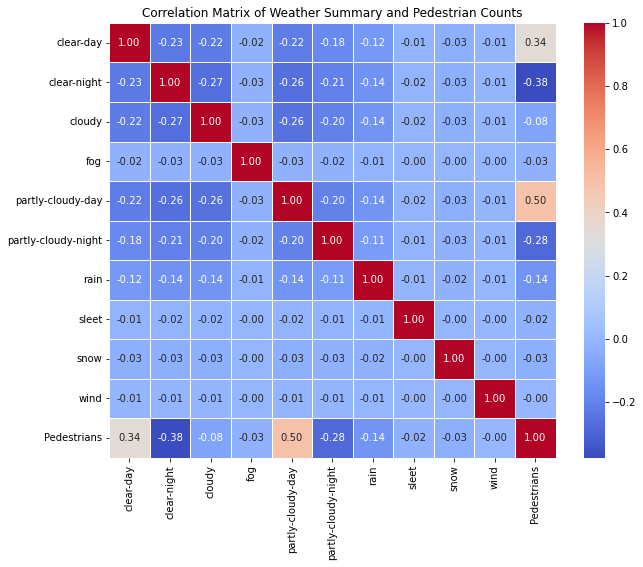

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()